<a href="https://colab.research.google.com/github/susmitbanerjee/ML-Practice-Notebooks/blob/main/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [10]:
import math

N = 1000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range (0 , N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if(number_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)) / number_of_selections[i]
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad]+1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

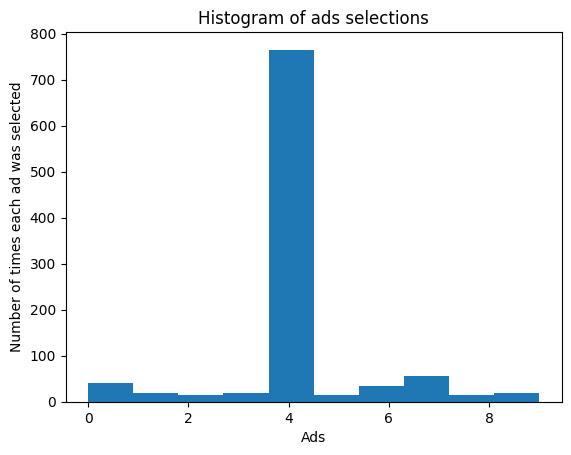

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()